## How to plot a map

In this last notebook, we'll finally plot our colour-coded map of Singapore, with each road colour representing a different linguistic origin. But first, we need to merge a few files so that our original GeoJSON file that has all the linestring information is augmented with linguistic origin information.

### Merging files with (Geo)Pandas

In [27]:
%matplotlib inline

import geopandas as gpd

In [28]:
# These are our three files

# File 1: The filtered list of roads
roads_df = gpd.read_file("singapore-roads-filtered.geojson")
roads_df

geometry         highway  \
0      LINESTRING (103.8284048 1.3068666, 103.8287382...         primary   
1      LINESTRING (103.8858462 1.3517778, 103.8859356...     residential   
2      LINESTRING (103.8387571 1.3126764, 103.83872 1...         primary   
3      LINESTRING (103.8395387 1.3132203, 103.8396493...        tertiary   
4      LINESTRING (103.8392505 1.3134495, 103.8394598...         primary   
5      LINESTRING (103.8373031 1.3147037, 103.8359738...     residential   
6      LINESTRING (103.8318305 1.3050277, 103.8315539...         primary   
7      LINESTRING (103.8348293 1.3004045, 103.8342528...       secondary   
8      LINESTRING (103.8348293 1.3004045, 103.8346883...       secondary   
9      LINESTRING (103.830813 1.3039006, 103.8302888 ...         primary   
10     LINESTRING (103.8313547 1.2960058, 103.83227 1...         primary   
11     LINESTRING (103.842836 1.291596, 103.8422129 1...     residential   
12     LINESTRING (103.8430392 1.2934171, 103.842244 ...     residential   
13     LINESTRING (103.8387207 1.2909753, 103.8388778...     residential   
14     LINESTRING (103.8387207 1.2909753, 103.8386978...     residential   
15     LINESTRING (103.843357 1.2895812, 103.8436285 ...     residential   
16     LINESTRING (103.8412716 1.2886074, 103.8414779...         primary   
17     LINESTRING (103.8420526 1.2900233, 103.8421061...       secondary   
18     LINESTRING (103.8447163 1.2885069, 103.8448984...     residential   
19     LINESTRING (103.8513753 1.3967862, 103.8518491...        motorway   
20     LINESTRING (103.8579655 1.3941346, 103.8580422...        motorway   
21     LINESTRING (103.8443907 1.3109684, 103.8445533...        motorway   
22     LINESTRING (103.8021677 1.2727921, 103.8022844...         primary   
23     LINESTRING (103.6372541 1.3480363, 103.6373882...        motorway   
24     LINESTRING (103.8341079 1.2723657, 103.8361228...        motorway   
25     LINESTRING (103.8541001 1.3977878, 103.8545108...        motorway   
26     LINESTRING (103.8541409 1.3976207, 103.8537589...        motorway   
27     LINESTRING (103.7572461 1.4233889, 103.757277 ...         primary   
28     LINESTRING (103.7740277 1.3968194, 103.7740856...        motorway   
29     LINESTRING (103.7024781 1.3606672, 103.7029984...        motorway   
...                                                  ...             ...   
10606  LINESTRING (103.7456548 1.3238507, 103.7456587...         primary   
10607  LINESTRING (103.9278275 1.3236756, 103.9294382...         primary   
10608  LINESTRING (103.9090633 1.4008567, 103.9089959...        tertiary   
10609  LINESTRING (103.9085407 1.4013837, 103.9090685...        tertiary   
10610  LINESTRING (103.8635402 1.3219606, 103.8636524...         primary   
10611  LINESTRING (103.9878283 1.3174213, 103.9873099...       secondary   
10612  LINESTRING (103.9819889 1.32008, 103.9822557 1...       secondary   
10613  LINESTRING (103.9880358 1.3171467, 103.9882954...    unclassified   
10614  LINESTRING (103.7480459 1.3364131, 103.7477151...    unclassified   
10615  LINESTRING (103.7471773 1.3321312, 103.7473666...       secondary   
10616  LINESTRING (103.7476578 1.3368285, 103.7476645...       secondary   
10617  LINESTRING (103.7587476 1.3306791, 103.7580119...    unclassified   
10618  LINESTRING (103.7605157 1.3375774, 103.760884 ...     residential   
10619  LINESTRING (103.7717609 1.3410362, 103.7718022...     residential   
10620  LINESTRING (103.8737945 1.3560351, 103.8735798...       secondary   
10621  LINESTRING (103.7667516 1.2907781, 103.7671805...       secondary   
10622  LINESTRING (103.7666223 1.2908582, 103.7667516...       secondary   
10623  LINESTRING (103.8479024 1.2838138, 103.8482049...     residential   
10624  LINESTRING (103.8448404 1.2907019, 103.8447671...     residential   
10625  LINESTRING (103.7465423 1.4078451, 103.7462293...       secondary   
10626  LINESTRING (103.7469404 1.4300587, 103.7469354...       secondary   
10627  LINESTRING (1

In [29]:
# File 2: The list of corrected road names. This is a "bridge" between the name given
# in the GeoJSON file and the actual name used in the classification step.

bridge_df = gpd.pd.read_csv("singapore-roadnames-final-split.csv")
bridge_df.drop(["Unnamed: 0", "has_malay_road_tag"], inplace=True, axis=1)
bridge_df

name                final_name       road_name  \
0                 Orchard Road              Orchard Road         Orchard   
1             Hougang Avenue 1          Hougang Avenue 1         Hougang   
2                  Scotts Road               Scotts Road          Scotts   
3                Keng Lee Road             Keng Lee Road        Keng Lee   
4                  Newton Road               Newton Road          Newton   
5                 Sarkies Road              Sarkies Road         Sarkies   
6               Patterson Road             Paterson Road        Paterson   
7            Orchard Boulevard         Orchard Boulevard         Orchard   
8                  Grange Road               Grange Road          Grange   
9                Paterson Hill             Paterson Hill        Paterson   
10           River Valley Road         River Valley Road           River   
11                Unity Street              Unity Street           Unity   
12                 Merbau Road               Merbau Road          Merbau   
13         Mohamed Sultan Road       Mohamed Sultan Road  Mohamed Sultan   
14               Saiboo Street             Saiboo Street          Saiboo   
15               Merchant Loop             Merchant Loop        Merchant   
16           Clemenceau Avenue         Clemenceau Avenue      Clemenceau   
17               Merchant Road             Merchant Road        Merchant   
18                Read Cresent             Read Crescent            Read   
19         Tampines Expressway       Tampines Expressway        Tampines   
20          Seletar Expressway        Seletar Expressway         Seletar   
21          Central Expressway        Central Expressway         Central   
22          Telok Blangah Road        Telok Blangah Road   Telok Blangah   
23       Ayer Rajah Expressway     Ayer Rajah Expressway      Ayer Rajah   
24            Turf Club Avenue          Turf Club Avenue       Turf Club   
25           Kranji Expressway         Kranji Expressway          Kranji   
26              Prinsep Street            Prinsep Street         Prinsep   
27                Tanglin Road              Tanglin Road         Tanglin   
28              Alexandra Road            Alexandra Road       Alexandra   
29              Nicoll Highway            Nicoll Highway          Nicoll   
...                        ...                       ...             ...   
3404        Seletar North Link        Seletar North Link         Seletar   
3405             Ghim Moh Link             Ghim Moh Link        Ghim Moh   
3406         Hougang Street 31         Hougang Street 31         Hougang   
3407         Hougang Street 32         Hougang Street 32         Hougang   
3408            Serangoon Lane            Serangoon Lane       Serangoon   
3409               Gambir Walk               Gambir Walk          Gambir   
3410  Upper Serangoon Crescent  Upper Serangoon Crescent       Serangoon   
3411                 Ubi Close                 Ubi Close             Ubi   
3412             Sin Ming Lane             Sin Ming Lane        Sin Ming   
3413          Compassvale Lane          Compassvale Lane     Compassvale   
3414      Lorong 5 Realty Park      Lorong 5 Realty Park   Lorong Realty   
3415              Wee Nam Road              Wee Nam Road         Wee Nam   
3416        Tampines Street 72        Tampines Street 72        Tampines   
3417         Changi South Lane         Changi South Lane          Changi   
3418          Telegraph Street          Telegraph Street       Telegraph   
3419           Biopolis Street           Biopolis Street        Biopolis   
3420             Biopolis Link             Biopolis Link        Biopolis   
3421           Plymouth Avenue           Plymouth Avenue        Plymouth   
3422               Gentle Road               Gentle Road          Gentle   
3423            Leicester Road            Leicester Road       Leicester   
3424                Simon Walk                Simon Walk           Simon  

In [30]:
# And lastly, this file gives us the classification info

classification_df = gpd.pd.read_csv('singapore-roadnames-final-classified.csv')
classification_df.drop(["has_malay_road_tag", "Unnamed: 0", "comment"], inplace=True, axis=1)
classification_df

road_name classification
0              Abingdon        British
1             Abu Talib          Malay
2                  Adam        British
3                  Adat          Malay
4                  Adis          Other
5             Admiralty        British
6               Ah Hood        Chinese
7                Ah Soo        Chinese
8         Ahmad Ibrahim          Malay
9                  Aida          Other
10              Airport        Generic
11            Alexandra        British
12               Aliwal         Indian
13             Aljunied          Other
14          Allanbrooke        British
15              Allenby        British
16               Almond        Generic
17              Alnwick        British
18                 Alps          Other
19             Ama Keng        Chinese
20                Amber          Other
21                 Amoy        Chinese
22               Ampang          Malay
23                Ampas          Malay
24                Ampat          Malay
25           Anak Bukit          Malay
26          Anak Patong          Malay
27             Anamalai         Indian
28           Anchorvale        Generic
29             Anderson        British
...                 ...            ...
1721          Woodgrove        Generic
1722           Woodland        Generic
1723          Woodlands        Generic
1724          Woodleigh        British
1725         Woodsville        Generic
1726         Woollerton        British
1727           Worthing        British
1728              Xilin        Chinese
1729            Yan Kit        Chinese
1730             Yarrow        British
1731            Yarwood        British
1732              Yasin          Malay
1733       Yio Chu Kang        Chinese
1734             Yishun        Chinese
1735          Yong Siak        Chinese
1736               York        British
1737          Youngberg        British
1738         Yuan Ching        Chinese
1739           Yuk Tong        Chinese
1740            Yung An        Chinese
1741            Yung Ho        Chinese
1742         Yung Kuang        Chinese
1743         Yung Sheng        Chinese
1744             Yunnan        Chinese
1745             Zamrud          Malay
1746            Zehnder          Other
1747               Zion          Other
1748         Zubir Said          Malay
1749              kukoh          Malay
1750  one-north Gateway        Generic

[1751 rows x 2 columns]

In [31]:
# First we merge the last two files.

merged_df = bridge_df.merge(classification_df, how="left", on="road_name")
merged_df

name                final_name       road_name  \
0                 Orchard Road              Orchard Road         Orchard   
1             Hougang Avenue 1          Hougang Avenue 1         Hougang   
2                  Scotts Road               Scotts Road          Scotts   
3                Keng Lee Road             Keng Lee Road        Keng Lee   
4                  Newton Road               Newton Road          Newton   
5                 Sarkies Road              Sarkies Road         Sarkies   
6               Patterson Road             Paterson Road        Paterson   
7            Orchard Boulevard         Orchard Boulevard         Orchard   
8                  Grange Road               Grange Road          Grange   
9                Paterson Hill             Paterson Hill        Paterson   
10           River Valley Road         River Valley Road           River   
11                Unity Street              Unity Street           Unity   
12                 Merbau Road               Merbau Road          Merbau   
13         Mohamed Sultan Road       Mohamed Sultan Road  Mohamed Sultan   
14               Saiboo Street             Saiboo Street          Saiboo   
15               Merchant Loop             Merchant Loop        Merchant   
16           Clemenceau Avenue         Clemenceau Avenue      Clemenceau   
17               Merchant Road             Merchant Road        Merchant   
18                Read Cresent             Read Crescent            Read   
19         Tampines Expressway       Tampines Expressway        Tampines   
20          Seletar Expressway        Seletar Expressway         Seletar   
21          Central Expressway        Central Expressway         Central   
22          Telok Blangah Road        Telok Blangah Road   Telok Blangah   
23       Ayer Rajah Expressway     Ayer Rajah Expressway      Ayer Rajah   
24            Turf Club Avenue          Turf Club Avenue       Turf Club   
25           Kranji Expressway         Kranji Expressway          Kranji   
26              Prinsep Street            Prinsep Street         Prinsep   
27                Tanglin Road              Tanglin Road         Tanglin   
28              Alexandra Road            Alexandra Road       Alexandra   
29              Nicoll Highway            Nicoll Highway          Nicoll   
...                        ...                       ...             ...   
3404        Seletar North Link        Seletar North Link         Seletar   
3405             Ghim Moh Link             Ghim Moh Link        Ghim Moh   
3406         Hougang Street 31         Hougang Street 31         Hougang   
3407         Hougang Street 32         Hougang Street 32         Hougang   
3408            Serangoon Lane            Serangoon Lane       Serangoon   
3409               Gambir Walk               Gambir Walk          Gambir   
3410  Upper Serangoon Crescent  Upper Serangoon Crescent       Serangoon   
3411                 Ubi Close                 Ubi Close             Ubi   
3412             Sin Ming Lane             Sin Ming Lane        Sin Ming   
3413          Compassvale Lane          Compassvale Lane     Compassvale   
3414      Lorong 5 Realty Park      Lorong 5 Realty Park   Lorong Realty   
3415              Wee Nam Road              Wee Nam Road         Wee Nam   
3416        Tampines Street 72        Tampines Street 72        Tampines   
3417         Changi South Lane         Changi South Lane          Changi   
3418          Telegraph Street          Telegraph Street       Telegraph   
3419           Biopolis Street           Biopolis Street        Biopolis   
3420             Biopolis Link             Biopolis Link        Biopolis   
3421           Plymouth Avenue           Plymouth Avenue        Plymouth   
3422               Gentle Road               Gentle Road          Gentle   
3423            Leicester Road            Leicester Road       Leicester   
3424                Simon Walk                Simon Walk           Simon  

In [32]:
# Now we do the second road of merging:

final_df = roads_df.merge(merged_df, how="left", on="name")
final_df

geometry         highway  \
0      LINESTRING (103.8284048 1.3068666, 103.8287382...         primary   
1      LINESTRING (103.8858462 1.3517778, 103.8859356...     residential   
2      LINESTRING (103.8387571 1.3126764, 103.83872 1...         primary   
3      LINESTRING (103.8395387 1.3132203, 103.8396493...        tertiary   
4      LINESTRING (103.8392505 1.3134495, 103.8394598...         primary   
5      LINESTRING (103.8373031 1.3147037, 103.8359738...     residential   
6      LINESTRING (103.8318305 1.3050277, 103.8315539...         primary   
7      LINESTRING (103.8348293 1.3004045, 103.8342528...       secondary   
8      LINESTRING (103.8348293 1.3004045, 103.8346883...       secondary   
9      LINESTRING (103.830813 1.3039006, 103.8302888 ...         primary   
10     LINESTRING (103.8313547 1.2960058, 103.83227 1...         primary   
11     LINESTRING (103.842836 1.291596, 103.8422129 1...     residential   
12     LINESTRING (103.8430392 1.2934171, 103.842244 ...     residential   
13     LINESTRING (103.8387207 1.2909753, 103.8388778...     residential   
14     LINESTRING (103.8387207 1.2909753, 103.8386978...     residential   
15     LINESTRING (103.843357 1.2895812, 103.8436285 ...     residential   
16     LINESTRING (103.8412716 1.2886074, 103.8414779...         primary   
17     LINESTRING (103.8420526 1.2900233, 103.8421061...       secondary   
18     LINESTRING (103.8447163 1.2885069, 103.8448984...     residential   
19     LINESTRING (103.8513753 1.3967862, 103.8518491...        motorway   
20     LINESTRING (103.8579655 1.3941346, 103.8580422...        motorway   
21     LINESTRING (103.8443907 1.3109684, 103.8445533...        motorway   
22     LINESTRING (103.8021677 1.2727921, 103.8022844...         primary   
23     LINESTRING (103.6372541 1.3480363, 103.6373882...        motorway   
24     LINESTRING (103.8341079 1.2723657, 103.8361228...        motorway   
25     LINESTRING (103.8541001 1.3977878, 103.8545108...        motorway   
26     LINESTRING (103.8541409 1.3976207, 103.8537589...        motorway   
27     LINESTRING (103.7572461 1.4233889, 103.757277 ...         primary   
28     LINESTRING (103.7740277 1.3968194, 103.7740856...        motorway   
29     LINESTRING (103.7024781 1.3606672, 103.7029984...        motorway   
...                                                  ...             ...   
10606  LINESTRING (103.7456548 1.3238507, 103.7456587...         primary   
10607  LINESTRING (103.9278275 1.3236756, 103.9294382...         primary   
10608  LINESTRING (103.9090633 1.4008567, 103.9089959...        tertiary   
10609  LINESTRING (103.9085407 1.4013837, 103.9090685...        tertiary   
10610  LINESTRING (103.8635402 1.3219606, 103.8636524...         primary   
10611  LINESTRING (103.9878283 1.3174213, 103.9873099...       secondary   
10612  LINESTRING (103.9819889 1.32008, 103.9822557 1...       secondary   
10613  LINESTRING (103.9880358 1.3171467, 103.9882954...    unclassified   
10614  LINESTRING (103.7480459 1.3364131, 103.7477151...    unclassified   
10615  LINESTRING (103.7471773 1.3321312, 103.7473666...       secondary   
10616  LINESTRING (103.7476578 1.3368285, 103.7476645...       secondary   
10617  LINESTRING (103.7587476 1.3306791, 103.7580119...    unclassified   
10618  LINESTRING (103.7605157 1.3375774, 103.760884 ...     residential   
10619  LINESTRING (103.7717609 1.3410362, 103.7718022...     residential   
10620  LINESTRING (103.8737945 1.3560351, 103.8735798...       secondary   
10621  LINESTRING (103.7667516 1.2907781, 103.7671805...       secondary   
10622  LINESTRING (103.7666223 1.2908582, 103.7667516...       secondary   
10623  LINESTRING (103.8479024 1.2838138, 103.8482049...     residential   
10624  LINESTRING (103.8448404 1.2907019, 103.8447671...     residential   
10625  LINESTRING (103.7465423 1.4078451, 103.7462293...       secondary   
10626  LINESTRING (103.7469404 1.4300587, 103.7469354...       secondary   
10627  LINESTRING (1

In [33]:
# There are a few NaNs in here as a result of the order in which I did filtering in
# the first notebook, so let's just drop them again

final_df2 = final_df[final_df['classification'].notnull()]
type(final_df2)

pandas.core.frame.DataFrame

In [34]:
# we lost the Geo-ness, convert back to GeoDataFrame
final_df2 = gpd.GeoDataFrame(final_df2)

In [35]:
# Let's save it

final_df2.to_file("singapore-roads-classified.geojson", driver="GeoJSON")

### Plotting the map

In this notebook, I'm going to show you the easiest way I know of to plot a map like this, using [`mplleaflet`](https://github.com/jwass/mplleaflet), a library by Jake Wasserman. It's not on `pip` yet so you'll have to install it from git:

`pip install git+git://github.com/jwass/mplleaflet.git`

It also requires the library `mplexporter`:

`pip install git+git://github.com/mpld3/mplexporter.git`

Afterwards I'll list a few ways I know about of making prettier maps.

In [36]:
import matplotlib.pyplot as plt
import mplleaflet

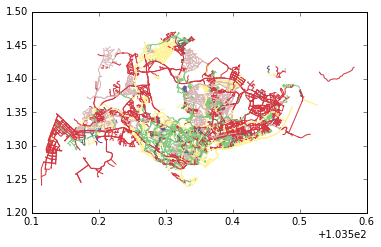

In [37]:
# GeoPandas' plot function can take a column and colour-code by this column
ax = final_df2.plot(column='classification', colormap="Accent")

At this point, we have a matplotlib map. We could export it to PDF, but it's not a terribly good way to present our data. Let me show you a nifty way to open this very map in an interactive interface - moreover, on top of a basemap that shows extra information like roadnames.

In [15]:
mplleaflet.display(fig=ax.figure, crs=final_df2.crs, tiles='cartodb_positron')

You can pan, zoom in, etc - right within this notebook, which is super cool. And it took only a couple of commands. If you want to use this map elsewhere, you can export it with the following command: just replace `display` with `show`, and supply a filepath.

In [38]:
mplleaflet.show(fig=ax.figure, crs=final_df2.crs, tiles='cartodb_positron', path='sgmap.html')

Now, there's some problems with this map. We weren't controlling what colours were assigned to each road, for example. We can't control the thickness of the linestrings at various zoom levels (a Leaflet issue). Also, there's no legend. While I don't know how to solve the second two problems, there is a way to solve the first, which is to define a custom colormap in the order in which GeoPandas draws each batch of linestrings.

In [39]:
# the order is this: a sorted list of values
categories = list(set(final_df2['classification'].values))
categories.sort()

categories

['British', 'Chinese', 'Generic', 'Indian', 'Malay', 'Other']

In [40]:
# define the colormap with logical colours (for a Singaporean at least):
# blue for British
# red for Chinese
# etc
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('my cmap', ['blue', 
                                                     'red',
                                                     'gray',
                                                     'yellow',
                                                     'green',
                                                     'purple'])

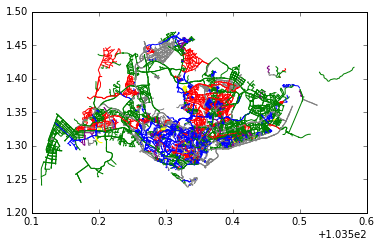

In [41]:
# pass the custom colormap
ax2 = final_df2.plot(column='classification', colormap=cmap)

In [42]:
mplleaflet.display(fig=ax2.figure, crs=final_df2.crs, tiles='cartodb_positron')

## Alternatives to mplleaflet

`mplleaflet` is awesome for exploratory data analysis, but you might want to have more control over how your map looks. For this, I recommend using one of the following:

* QGIS (C++ but has Python bindings)
* Mapnik (C++ but has Python bindings)
  * Tilemill (GUI built on top of Mapnik)

A nice feature of Tilemill is that it allows you to define your map styling using CartoCSS. For example, here's how we would define the colours:

You can also control the line width at various zoom levels:

Some web map sites like CartoDB also use CartoCSS. Here's a map I made in CartoDB, nicely styled with a legend.

In [141]:
from IPython.display import HTML
HTML("<iframe width='100%' height='520' frameborder='0' src='http://michelleful.cartodb.com/viz/b722485c-dbf6-11e4-9a7e-0e0c41326911/embed_map'></iframe>")

That's all, folks!